# Fashion MNIST
### By: Adi Hoftman-322267824 , Orya Spiegel-207018524


Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

* Each row is a separate image
* Column 1 is the class label.
* Remaining columns are pixel numbers (784 total).
* Each value is the darkness of the pixel (1 to 255)




### Questions we asked about our data
- How well can we predict the label of each item?
- Is it possible to get good predictions based on the colors of the item?
- Can we improve the results if we create categories for similar items?


### Techniques we used
- ADABOOST
- RANDOM FOREST
- NAIVE BAYES
- KNN


### Challenges we had
- We wanted to know if it's possible to classify using only the gray levels of each item. We didn't get good results for any of the models, and we realized this data is not enough to make the predictions, since there isn't a lot of difference between the average of the different labels.
- We wanted to check if creating categories for similar items will give us better results. For that we tried a few different ways to unite labels. On the one hand we wanted to get good classification results, at least like the ones we got with the original data, so we wanted to use as little groups as possible. On the other hand, we still want to keep the original information as much as possible, and uniting too many labels together is going to affect this. So we tried to keep as many of the original labels as possible while improving the labeling for similar items.  



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import random

In [2]:
df_train = pd.read_csv('../data/fashion-mnist_train.csv')
df_test = pd.read_csv('../data/fashion-mnist_test.csv')

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("train", df_train.shape)
print("test", df_test.shape)

train (60000, 785)
test (10000, 785)


In [5]:
#Check for missing data
df_train.isnull().sum().sum()

0

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.

## Labels

Each training and test example is assigned to one of the following labels:

0 - T-shirt/top

1 - Trouser

2 - Pullover

3 - Dress

4 - Coat

5 - Sandal

6 - Shirt

7 - Sneaker

8 - Bag

9 - Ankle boot

In [6]:
df_train.label.value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

C:\Users\oryas\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

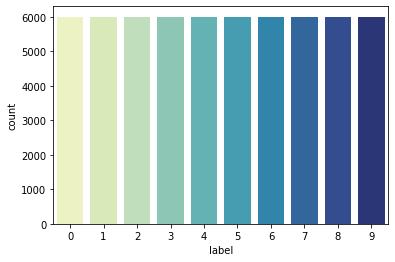

In [7]:
sns.countplot(df_train.label , palette='YlGnBu')

In [8]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Sneaker')

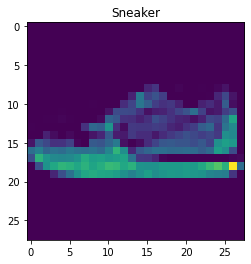

In [9]:
#Visualization
i = random.randint(1,60000) #select any random index from 1 to 60,000
train= np.array(df_train, dtype = 'float32')
plt.imshow(train[i,1:].reshape((28,28))) #reshape and plot the image

label_index = df_train["label"][i]
plt.title(f"{class_names[label_index]}")

In [10]:
#Prepare the training and testing dataset 
X_train = df_train.drop(columns='label')
y_train = df_train['label']

X_test = df_test.drop(columns='label')
y_test = df_test['label']

## Making Predictions

### ADABOOST

In [11]:
# Boosting refers to any method that can combine several weak learners into a strong learner. The general idea
# of mostboosting methods is to train predictors sequentially, each trying to correct its predecessor.

# The AdaBoost classifier begins by fitting a classifier on the original dataset and then fits additional
# copies of the classifier on the same dataset but where the weights of incorrectly classified instances
# are adjusted such that subsequent classifiers focus more on difficult cases.

In [12]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
ada_predictions= ada.predict(X_test)

In [13]:
#Classification report
print(classification_report(y_test, ada_predictions, target_names= class_names))

              precision    recall  f1-score   support

 T_shirt/top       0.37      0.04      0.07      1000
     Trouser       0.82      0.79      0.80      1000
    Pullover       0.46      0.28      0.35      1000
       Dress       0.46      0.91      0.61      1000
        Coat       0.50      0.54      0.52      1000
      Sandal       0.90      0.58      0.71      1000
       Shirt       0.27      0.35      0.30      1000
     Sneaker       0.52      0.96      0.67      1000
         Bag       0.91      0.90      0.90      1000
  Ankle boot       0.90      0.47      0.62      1000

    accuracy                           0.58     10000
   macro avg       0.61      0.58      0.56     10000
weighted avg       0.61      0.58      0.56     10000



In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ada_predictions)

0.5806

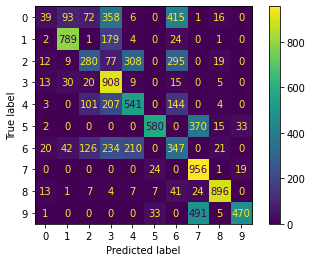

In [15]:
ConfusionMatrixDisplay.from_estimator(ada, X_test, y_test)#, cmap='magma')

### RANDOM FOREST

In [16]:
# Random Forest is a model made up of many decision trees. When using a decision tree classifier we will often have 
# overfitting if the data has high variance. As an alternative to limiting the depth of the tree, which reduces 
# variance and increases bias, we combine many decision trees into a random forest.

# When training, each tree in a random forest learns from a random sample of the data points. The bootstrapping means 
# that some samples will be used multiple times in a single tree. The idea is that by training each tree on 
# different samples, although each tree might have high variance, the entire forest will have lower variance but
# not at the cost of increasing the bias.

In [17]:
#Creating the model with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_predictions= rf.predict(X_test)

In [18]:
print(classification_report(y_test, rf_predictions, target_names= class_names))

              precision    recall  f1-score   support

 T_shirt/top       0.81      0.86      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.81      0.80      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.80      0.86      0.82      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.75      0.60      0.67      1000
     Sneaker       0.92      0.93      0.92      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.93      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [19]:
accuracy_score(y_test, rf_predictions)

0.8827

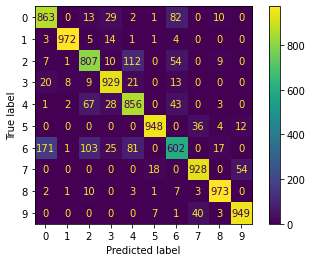

In [20]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)#, cmap='magma')

### NAÏVE BAYES

In [21]:
# In probability theory and statistics, Bayes' theorem describes the probability of an event, based on prior
# knowledge of conditions that might be related to the event.

# Naive Bayes is based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
# The fundamental Naive Bayes assumption is that each feature makes an independent contribution to the outcome.

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_predictions= nb.predict(X_test)

In [23]:
print(classification_report(y_test, nb_predictions, target_names= class_names))

              precision    recall  f1-score   support

 T_shirt/top       0.83      0.59      0.69      1000
     Trouser       0.69      0.94      0.79      1000
    Pullover       0.61      0.32      0.42      1000
       Dress       0.46      0.64      0.53      1000
        Coat       0.38      0.77      0.51      1000
      Sandal       0.89      0.29      0.44      1000
       Shirt       0.32      0.04      0.07      1000
     Sneaker       0.50      0.98      0.66      1000
         Bag       0.83      0.71      0.77      1000
  Ankle boot       0.92      0.63      0.75      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



In [24]:
accuracy_score(y_test, nb_predictions)

0.5914

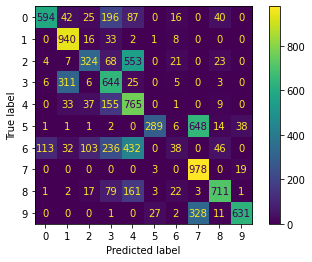

In [25]:
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)#, cmap='magma')

### KNN

In [26]:
# The k-nearest neighbors algorithm, also known as KNN, is a supervised learning classifier,
# which uses proximity to make classifications or predictions about the grouping of an individual data point. 
# A class label is assigned on the basis of a majority vote—i.e. the label that is most frequently represented
# around a given data point will be assigned to it.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_predictions= knn.predict(X_test)

In [28]:
print(classification_report(y_test, knn_predictions, target_names= class_names))

              precision    recall  f1-score   support

 T_shirt/top       0.75      0.87      0.80      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.74      0.82      0.78      1000
       Dress       0.91      0.87      0.89      1000
        Coat       0.81      0.77      0.79      1000
      Sandal       0.99      0.82      0.90      1000
       Shirt       0.68      0.59      0.63      1000
     Sneaker       0.88      0.94      0.91      1000
         Bag       0.98      0.95      0.97      1000
  Ankle boot       0.88      0.97      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [29]:
accuracy_score(y_test, knn_predictions)

0.8584

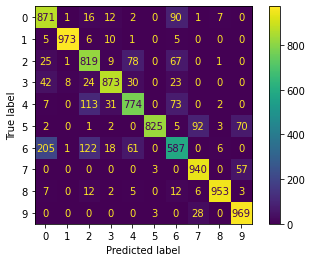

In [30]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)#, cmap='magma')

## Q2 -
### We want to check if it's possible to get good predictions based on the colors of the item
If we can get good results that could save a lot of space and a lot of time, since we will only need to save one column for each item instead of 784. 
We will do this using the mean() command which will give us the average of the gray levels for each item.

In [31]:
df_train2 = df_train.copy(deep=True)
df_train2_label = df_train2[['label']]
df_train2 = df_train2.drop(columns='label')
df_train2['average'] = df_train2.mean(axis=1)
df_train2 = df_train2[['average']]
df_train2 = df_train2.join(df_train2_label)


df_test2 = df_test.copy(deep=True)
df_test2_label = df_test2[['label']]
df_test2 = df_test2.drop(columns='label')
df_test2['average'] = df_test2.mean(axis=1)
df_test2 = df_test2[['average']]
df_test2 = df_test2.join(df_test2_label)


df_train2

,average,label
0,115.346939,2
1,58.885204,9
2,120.631378,6
3,86.492347,0
4,85.084184,3
...,...,...
59995,91.038265,9
59996,34.173469,1
59997,87.053571,8
59998,110.553571,8


### Now we can use the same models to try and predict the labels with the new data

In [32]:
#Prepare the training and testing dataset 
X_train2 = df_train2.drop(columns='label')
y_train2 = df_train2['label']

X_test2 = df_test2.drop(columns='label')
y_test2 = df_test2['label']

#### ADABOOST

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train2, y_train2)
ada_predictions= ada.predict(X_test2)

In [34]:
#Classification report
print(classification_report(y_test2, ada_predictions, target_names= class_names, zero_division=1))

              precision    recall  f1-score   support

 T_shirt/top       0.17      0.01      0.01      1000
     Trouser       0.26      0.55      0.35      1000
    Pullover       0.28      0.27      0.27      1000
       Dress       1.00      0.00      0.00      1000
        Coat       0.23      0.41      0.29      1000
      Sandal       0.55      0.46      0.50      1000
       Shirt       1.00      0.00      0.00      1000
     Sneaker       0.30      0.43      0.35      1000
         Bag       1.00      0.00      0.00      1000
  Ankle boot       0.20      0.57      0.29      1000

    accuracy                           0.27     10000
   macro avg       0.50      0.27      0.21     10000
weighted avg       0.50      0.27      0.21     10000



In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, ada_predictions)

0.2688

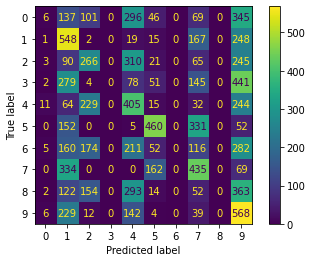

In [36]:
ConfusionMatrixDisplay.from_estimator(ada, X_test2, y_test2)

#### RANDOM FOREST

In [37]:
#Creating the model with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train2, y_train2)
rf_predictions= rf.predict(X_test2)

In [38]:
print(classification_report(y_test2, rf_predictions, target_names= class_names))

              precision    recall  f1-score   support

 T_shirt/top       0.12      0.12      0.12      1000
     Trouser       0.19      0.20      0.20      1000
    Pullover       0.15      0.14      0.15      1000
       Dress       0.12      0.11      0.11      1000
        Coat       0.19      0.18      0.18      1000
      Sandal       0.36      0.36      0.36      1000
       Shirt       0.13      0.13      0.13      1000
     Sneaker       0.23      0.24      0.24      1000
         Bag       0.12      0.12      0.12      1000
  Ankle boot       0.17      0.16      0.16      1000

    accuracy                           0.18     10000
   macro avg       0.18      0.18      0.18     10000
weighted avg       0.18      0.18      0.18     10000



In [39]:
accuracy_score(y_test2, rf_predictions)

0.1779

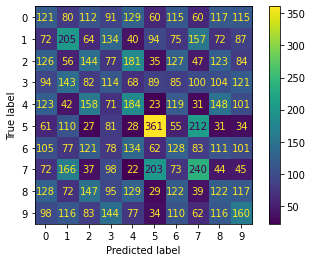

In [40]:
ConfusionMatrixDisplay.from_estimator(rf, X_test2, y_test2)

#### NAÏVE BAYES

In [41]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train2,y_train2)
nb_predictions= nb.predict(X_test2)

In [42]:
print(classification_report(y_test2, nb_predictions, target_names= class_names, zero_division=1))

              precision    recall  f1-score   support

 T_shirt/top       1.00      0.00      0.00      1000
     Trouser       0.26      0.53      0.34      1000
    Pullover       0.31      0.11      0.16      1000
       Dress       1.00      0.00      0.00      1000
        Coat       0.24      0.61      0.34      1000
      Sandal       0.50      0.55      0.52      1000
       Shirt       1.00      0.00      0.00      1000
     Sneaker       0.28      0.49      0.36      1000
         Bag       1.00      0.00      0.00      1000
  Ankle boot       0.20      0.45      0.28      1000

    accuracy                           0.27     10000
   macro avg       0.58      0.27      0.20     10000
weighted avg       0.58      0.27      0.20     10000



In [43]:
accuracy_score(y_test2, nb_predictions)

0.2736

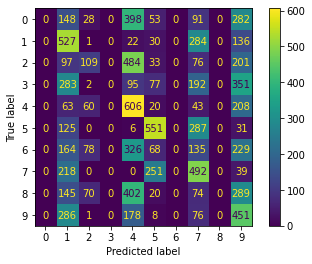

In [44]:
ConfusionMatrixDisplay.from_estimator(nb, X_test2, y_test2)

#### KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train2,y_train2)
knn_predictions= knn.predict(X_test2)

In [46]:
print(classification_report(y_test2, knn_predictions, target_names= class_names))

              precision    recall  f1-score   support

 T_shirt/top       0.11      0.26      0.16      1000
     Trouser       0.19      0.36      0.25      1000
    Pullover       0.16      0.22      0.18      1000
       Dress       0.13      0.13      0.13      1000
        Coat       0.17      0.13      0.15      1000
      Sandal       0.42      0.36      0.39      1000
       Shirt       0.14      0.06      0.08      1000
     Sneaker       0.26      0.15      0.19      1000
         Bag       0.12      0.04      0.06      1000
  Ankle boot       0.17      0.07      0.10      1000

    accuracy                           0.18     10000
   macro avg       0.19      0.18      0.17     10000
weighted avg       0.19      0.18      0.17     10000



In [47]:
accuracy_score(y_test2, knn_predictions)

0.1795

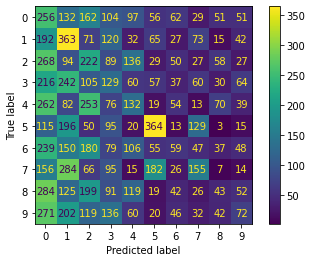

In [48]:
ConfusionMatrixDisplay.from_estimator(knn, X_test2, y_test2)

#### We can see that classifying the items based on the everage gray level is not working, the results are a lot worse than the original results. When we looked at the data using the scatter plot we realised that most of the items have the same average of gray level which explains th results.

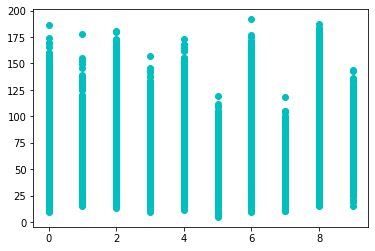

In [49]:
plt.scatter(df_train2.label, df_train2.average, c='c')

## Q3 -
### We want to check if it's possible to improve the results if we create categories for similar items
Our new labels will represent:

0 - T-shirt/top, shirt

1 - Trouser

2 - Pullover, Coat

3 - Dress

4 - Sandal, Sneaker, Ankle boot

5 - Bag

In [50]:
label_map = {0:0, 1:1, 2:2, 3:3, 4:2, 5:4, 6:0, 7:4, 8:5, 9:4}
class_names = ['T_shirt/top, Shirt', 'Trouser', 'Pullover, Coat', 'Dress', 'Sandal, Sneaker, Ankle boot', 'Bag']

df_train3 = df_train.copy(deep=True)
df_train3['category'] = df_train3["label"].map(label_map)

df_test3 = df_test.copy(deep=True)
df_test3['category'] = df_test3["label"].map(label_map)


sec_col = df_train3.pop('category')
df_train3.insert(1, 'category', sec_col)
df_train3

,label,category,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,1,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,5,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now we will use the same models to try and predict the categories with the new data

In [51]:
#Prepare the training and testing dataset 
X_train3 = df_train3.drop(columns=['label', 'category'])
y_train3 = df_train3['category']

X_test3 = df_test3.drop(columns=['label', 'category'])
y_test3 = df_test3['category']

#### ADABOOST

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train3, y_train3)
ada_predictions = ada.predict(X_test3)

In [53]:
#Classification report
print(classification_report(y_test3, ada_predictions, target_names=class_names, zero_division=1))

                             precision    recall  f1-score   support

         T_shirt/top, Shirt       0.51      0.09      0.16      2000
                    Trouser       0.45      0.88      0.60      1000
             Pullover, Coat       0.71      0.83      0.76      2000
                      Dress       0.62      0.79      0.70      1000
Sandal, Sneaker, Ankle boot       0.97      0.99      0.98      3000
                        Bag       0.87      0.87      0.87      1000

                   accuracy                           0.74     10000
                  macro avg       0.69      0.74      0.68     10000
               weighted avg       0.73      0.74      0.70     10000



In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3, ada_predictions)

0.737

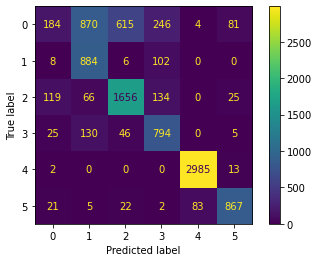

In [55]:
ConfusionMatrixDisplay.from_estimator(ada, X_test3, y_test3)

#### RANDOM FOREST

In [56]:
#Creating the model with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train3, y_train3)
rf_predictions= rf.predict(X_test3)

In [57]:
print(classification_report(y_test3, rf_predictions, target_names= class_names))

                             precision    recall  f1-score   support

         T_shirt/top, Shirt       0.91      0.87      0.89      2000
                    Trouser       0.99      0.97      0.98      1000
             Pullover, Coat       0.88      0.93      0.91      2000
                      Dress       0.92      0.91      0.91      1000
Sandal, Sneaker, Ankle boot       1.00      1.00      1.00      3000
                        Bag       0.97      0.97      0.97      1000

                   accuracy                           0.94     10000
                  macro avg       0.94      0.94      0.94     10000
               weighted avg       0.94      0.94      0.94     10000



In [58]:
accuracy_score(y_test3, rf_predictions)

0.9439

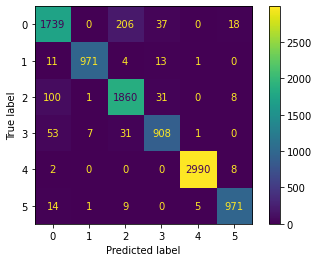

In [59]:
ConfusionMatrixDisplay.from_estimator(rf, X_test3, y_test3)

#### NAÏVE BAYES

In [60]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train3,y_train3)
nb_predictions= nb.predict(X_test3)

In [61]:
print(classification_report(y_test3, nb_predictions, target_names= class_names, zero_division=1))

                             precision    recall  f1-score   support

         T_shirt/top, Shirt       0.85      0.35      0.49      2000
                    Trouser       0.69      0.94      0.79      1000
             Pullover, Coat       0.66      0.80      0.72      2000
                      Dress       0.42      0.65      0.51      1000
Sandal, Sneaker, Ankle boot       1.00      0.97      0.98      3000
                        Bag       0.80      0.72      0.76      1000

                   accuracy                           0.75     10000
                  macro avg       0.73      0.74      0.71     10000
               weighted avg       0.79      0.75      0.74     10000



In [62]:
accuracy_score(y_test3, nb_predictions)

0.7515

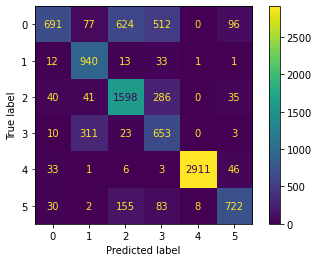

In [63]:
ConfusionMatrixDisplay.from_estimator(nb, X_test3, y_test3)

#### KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train3,y_train3)
knn_predictions= knn.predict(X_test3)

In [65]:
print(classification_report(y_test3, knn_predictions, target_names= class_names))

                             precision    recall  f1-score   support

         T_shirt/top, Shirt       0.85      0.88      0.87      2000
                    Trouser       0.99      0.97      0.98      1000
             Pullover, Coat       0.87      0.89      0.88      2000
                      Dress       0.93      0.87      0.90      1000
Sandal, Sneaker, Ankle boot       1.00      1.00      1.00      3000
                        Bag       0.98      0.95      0.97      1000

                   accuracy                           0.93     10000
                  macro avg       0.94      0.93      0.93     10000
               weighted avg       0.93      0.93      0.93     10000



In [66]:
accuracy_score(y_test3, knn_predictions)

0.9327

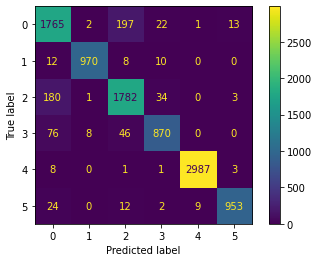

In [67]:
ConfusionMatrixDisplay.from_estimator(knn, X_test3, y_test3)

### We can see that the results have improved for all models, and the models that had low results in the original data have improved significantly

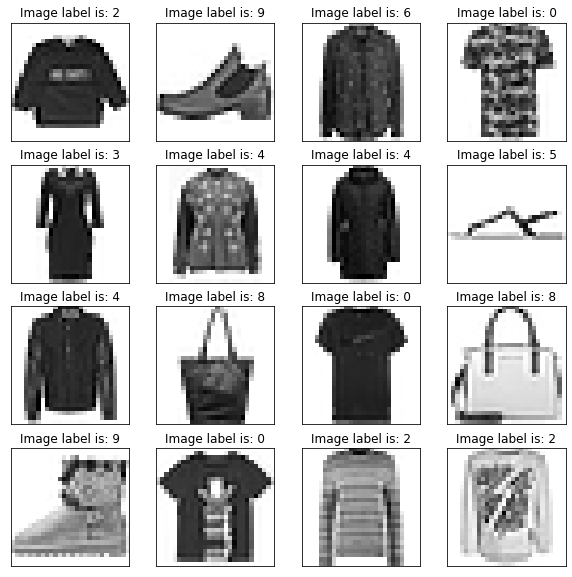

In [68]:
#Visualization
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train[i,1:].reshape((28,28)), cmap=plt.cm.binary)
    plt.title("Image label is: {}".format(y_train[i]))
plt.show()